<a href="https://colab.research.google.com/github/gmauricio-toledo/NLP-MCD/blob/main/14-BERT-TopicModelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>BERTopic</h1>

En esta notebook usaremos [BERTopic](https://github.com/MaartenGr/BERTopic) para la tarea de Topic Modelling.

Este modelo usa un modelo de BERT para producir embeddings de documentos que luego son clusterizados y agrupados usando TF-IDF.

[Más información](https://maartengr.github.io/BERTopic/algorithm/algorithm.html)

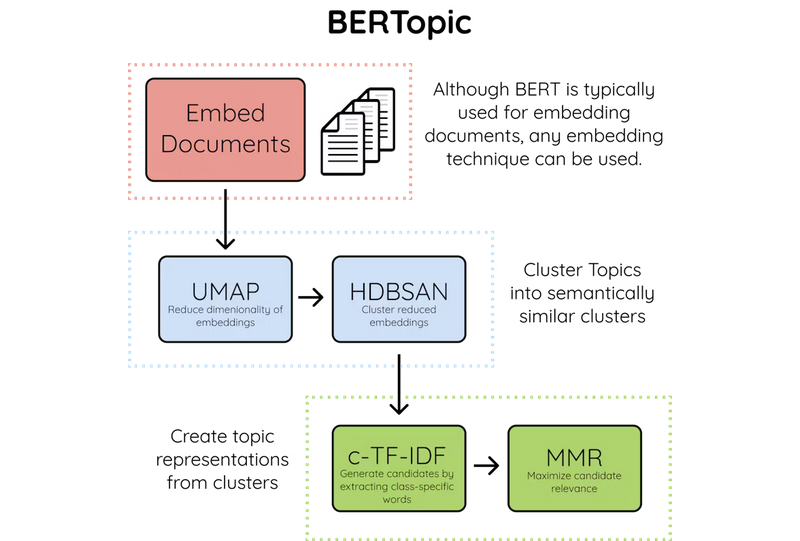

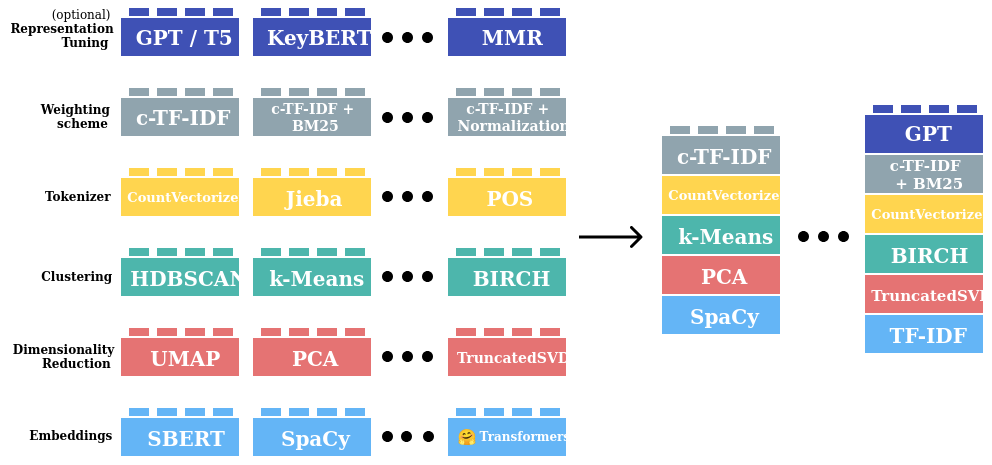

In [ ]:
!pip install -qq bertopic

In [2]:
!pip install -qq bertopic[visualization]

In [37]:
!pip install -qq wordcloud

In [3]:
from bertopic import BERTopic

In [7]:
import pandas as pd
import numpy as np
import re
from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')
nltk.download('punkt')

stopwords = stopwords.words('english')
stopwords.extend(['from', 'subject', 're', 'edu', 'use'])
stopwords.extend(["n't","S","s"])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [4]:
from sklearn.datasets import fetch_20newsgroups

train_data = fetch_20newsgroups(subset='train',
                                remove=('headers', 'footers', 'quotes'),
                                categories=['sci.space', 'rec.sport.baseball','sci.med'],
                                random_state=642
                                )
test_data = fetch_20newsgroups(subset='test',
                                remove=('headers', 'footers', 'quotes'),
                                categories=['sci.space', 'rec.sport.baseball','sci.med'],
                                random_state=642
                               )

X_train_raw = train_data.data
y_train = train_data.target

X_test_raw = test_data.data
y_test = test_data.target

In [5]:
X_raw = X_train_raw + X_test_raw
y = np.concatenate((y_train, y_test))

In [8]:
X_raw = [re.sub(r'\d+', ' ', doc) for doc in X_raw]
tokenized_docs = [[x for x in word_tokenize(doc) if x not in stopwords and x not in punctuation]
                        for doc in X_raw]
docs = [' '.join(doc) for doc in tokenized_docs]

El entrenamiento tarda alrededor de 4 minutos

In [59]:
model = BERTopic(verbose=True)

topics, probabilities = model.fit_transform(docs)

2024-11-05 23:07:21,114 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/93 [00:00<?, ?it/s]

2024-11-05 23:12:26,731 - BERTopic - Embedding - Completed ✓
2024-11-05 23:12:28,966 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-11-05 23:12:50,482 - BERTopic - Dimensionality - Completed ✓
2024-11-05 23:12:52,001 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-11-05 23:12:52,208 - BERTopic - Cluster - Completed ✓
2024-11-05 23:12:52,215 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-11-05 23:12:52,934 - BERTopic - Representation - Completed ✓


Cuando hay un tópico -1, este representa documentos *outliers*

In [60]:
model.get_topic_freq()

,Topic,Count
1,0,1962
0,1,898
2,2,70
3,3,41


Número de tópicos:

In [61]:
num_topics = len([x for x in model.get_topic_info()['Topic'] if x != -1])
num_topics

4

In [62]:
model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,0,1962,0_the_space_would_one,"[the, space, would, one, also, it, this, like,...",[Archive-name space/groups Last-modified Date ...
1,1,898,1_game_year_would_the,"[game, year, would, the, team, games, last, th...",[Oops I came across file last year Thought mig...
2,2,70,2_curiousity_worden_hello_choose,"[curiousity, worden, hello, choose, answer, ju...","[Hello, Just curiousity old Worden -- ________..."
3,3,41,3_bullshit_why_good_it,"[bullshit, why, good, it, , , , , , ]","[good, Why, BULLSHIT]"


In [63]:
model.visualize_topics()

In [64]:
model.visualize_barchart()

In [65]:
for k in range(num_topics):
    words = [x[0] for x in model.get_topic(k)]
    print(f"Topic {k}: {words}")

Topic 0: ['the', 'space', 'would', 'one', 'also', 'it', 'this', 'like', 'get', 'people']
Topic 1: ['game', 'year', 'would', 'the', 'team', 'games', 'last', 'think', 'baseball', 'good']
Topic 2: ['curiousity', 'worden', 'hello', 'choose', 'answer', 'just', 'following', 'old', 'anyone', 'know']
Topic 3: ['bullshit', 'why', 'good', 'it', '', '', '', '', '', '']


In [66]:
model.visualize_heatmap()

In [21]:
topics, probs = model.transform(docs)

Batches:   0%|          | 0/93 [00:00<?, ?it/s]

2024-11-05 21:35:23,409 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2024-11-05 21:35:23,425 - BERTopic - Dimensionality - Completed ✓
2024-11-05 21:35:23,430 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2024-11-05 21:35:23,623 - BERTopic - Cluster - Completed ✓


Esta representación tarda alrededor de 5 minutos

In [67]:
model.visualize_documents(docs, topics)

In [68]:
from sklearn.metrics import adjusted_mutual_info_score, adjusted_rand_score

print(f"AMI: {adjusted_mutual_info_score(y, topics)}")
print(f"ARI: {adjusted_rand_score(y, topics)}")

AMI: 0.5060502221276802
ARI: 0.44776169532140864


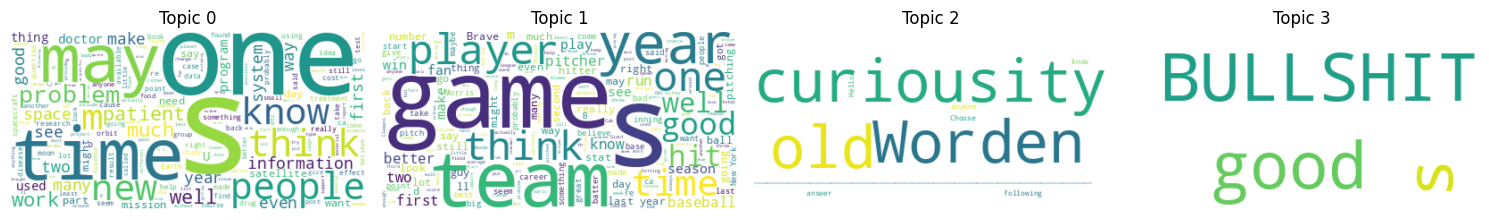

In [70]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

docs_idxs_per_topic = [np.where(np.array(topics) == i)[0] for i in range(num_topics)]

fig, axs = plt.subplots(1, num_topics, figsize=(15, 15))
for ax,j in zip(axs.flatten(),range(num_topics)):
    topic_docs = " ".join([docs[i] for i in docs_idxs_per_topic[j]])
    wc = WordCloud(background_color="white", max_words=2000).generate(topic_docs)
    ax.imshow(wc, interpolation='bilinear')
    ax.set_title(f"Topic {j}")
    ax.axis("off")
fig.tight_layout()
fig.show()

## Ajustemos los tópicos

In [81]:
new_model = BERTopic(nr_topics=10)

new_topics, new_probabilities = new_model.fit_transform(docs)

In [82]:
from sklearn.metrics import adjusted_mutual_info_score, adjusted_rand_score

print(f"AMI: {adjusted_mutual_info_score(y, new_topics)}")
print(f"ARI: {adjusted_rand_score(y, new_topics)}")

AMI: 0.48808613925164007
ARI: 0.4442318085032262


In [85]:
new_model.visualize_topics()

In [84]:
new_model.visualize_heatmap()

# 🔴 Tarea:

Obtener los embeddings de cada documento con algún modelo tipo BERT y clusterizarlos. ¿Se mejoran los rendimientos?